# Global Food Basket Price Analysis

### Importing necessary libraries

In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from selenium import webdriver

### Scraping the food product prices of Countries from the "globalproductprices" website

In [2]:
url = "https://www.globalproductprices.com/rankings/flour_prices/"
page = requests.get(url)
soup = BeautifulSoup(page.text,"html")
table = soup.find("table",class_ = "sortable")
Headers = table.find_all("th")[:2]
Headers = [data.text.strip() for data in Headers]
df = pd.DataFrame(columns = Headers)
rows = table.find_all("tr")
for data in rows[1:]:
    row = data.find_all("td")[:2]
    row_data = [x.text.strip() for x in row]
    index = len(df)
    df.loc[index] = row_data

In [3]:
df.head()

,Countries,"Flour prices, 1 kg"
0,Hong Kong,4.02
1,USA,3.62
2,Saudi Arabia,2.92
3,Puerto Rico,2.75
4,Ghana,2.66


In [4]:
items = ["rice_prices","sugar_prices","salt_prices","milk_prices","egg_prices","cooking_oil_prices","poultry_prices","potato_prices","onion_prices","banana_prices","tomato_prices","oranges_prices","coca_cola_price","mineral_water_prices"]

In [5]:
for item in items:
    url = f"https://www.globalproductprices.com/rankings/{item}/"
    page = requests.get(url)
    soup = BeautifulSoup(page.text,"html")
    table = soup.find("table",class_= "sortable")
    Headers = table.find_all("th")[:2]
    Headers = [x.text.strip() for x in Headers]
    temp_df = pd.DataFrame(columns=Headers)
    rows = table.find_all("tr")
    for data in rows[1:]:
        row = data.find_all("td")[:2]
        row_data = [i.text.strip() for i in row]
        index = len(temp_df)
        temp_df.loc[index] = row_data
    temp_df = temp_df.set_index("Countries")
    df = pd.merge(df,temp_df,on="Countries",how="inner")

In [6]:
df.head()

,Countries,"Flour prices, 1 kg","Rice prices, 1 kg","Sugar prices, 1 kg","Salt prices, 1 kg","Two percent milk prices, 1 liter","Eggs prices, dozen","Cooking oil prices, 1 liter","Chicken meat prices, 1 kg","Potato prices, 1 kg","Onion prices, 1 kg","Banana prices, 1 kg","Tomato prices, 1 kg","Orange prices, 1 kg","Coca-Cola prices, 0.5 liter",Bottled water prices
0,Hong Kong,4.02,1.97,3.18,1.61,3.09,4.71,7.14,8.03,3.22,5.06,1.87,3.07,3.52,1.21,1.27
1,USA,3.62,4.50,1.80,2.50,1.96,3.40,3.50,11.00,1.65,1.48,1.08,4.37,2.76,0.83,1.46
2,Saudi Arabia,2.92,2.61,1.33,1.25,1.60,2.35,4.64,4.83,1.32,2.00,1.85,1.85,2.00,1.00,0.33
3,Ghana,2.66,1.76,2.31,2.69,3.11,2.22,3.92,5.03,2.96,3.51,0.89,2.00,7.54,0.63,0.30
4,Peru,2.46,1.51,1.35,0.65,1.62,2.38,4.02,2.54,0.81,0.86,0.73,0.97,0.59,0.78,0.51


#### Renaming the  Columns

In [7]:
df = df.rename(columns={"Countries":"Country"})

In [8]:
df = df.rename(columns={"Flour prices, 1 kg":"Flour(1kg)","Rice prices, 1 kg":"Rice(1kg)","Sugar prices, 1 kg":"Sugar(1kg)","Salt prices, 1 kg":"Salt(1kg)","Two percent milk prices, 1 liter":"Milk(1L)","Eggs prices, dozen":"Eggs(Dozen)","Cooking oil prices, 1 liter":"Cooking Oil(1L)","Chicken meat prices, 1 kg":"Chicken(1kg)","Potato prices, 1 kg":"Potato(1kg)","Onion prices, 1 kg":"Onion(1kg)","Banana prices, 1 kg":"Banana(1kg)","Tomato prices, 1 kg":"Tomato(1kg)","Orange prices, 1 kg":"Orange(1Kg)","Coca-Cola prices, 0.5 liter":"Coca-Cola(0.5L)","Bottled water prices":"Bottled Water(1.5L)"})

#### Sample of Scraped data

In [9]:
df.sample()

,Country,Flour(1kg),Rice(1kg),Sugar(1kg),Salt(1kg),Milk(1L),Eggs(Dozen),Cooking Oil(1L),Chicken(1kg),Potato(1kg),Onion(1kg),Banana(1kg),Tomato(1kg),Orange(1Kg),Coca-Cola(0.5L),Bottled Water(1.5L)
52,Zambia,1.03,1.21,1.38,0.77,1.34,1.15,1.68,4.25,2.10,0.57,1.12,0.69,0.77,0.42,0.38


### Scraping the GDP per Capita (PPP) from wikipedia

In [10]:
url = "https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(PPP)_per_capita"
page = requests.get(url)
soup = BeautifulSoup(page.text,"html")
table = soup.find_all("table")[1]
headers = table.find_all("th")
headers = [data.text.strip() for data in headers]

In [11]:
headers

['Country/Territory',
 'UN Region',
 'IMF[5][6]',
 'World Bank[7]',
 'CIA[8][9][10]',
 'Estimate',
 'Year',
 'Estimate',
 'Year',
 'Estimate',
 'Year']

#### We only need Country UN Region and estimate PPP data

In [12]:
headers = ['Country/Territory','UN Region','Estimate']
dfr = pd.DataFrame(columns = headers)
rows = table.find_all("tr")
for data in rows[2:]:
    row = data.find_all("td")[:3]
    row_data = [x.text.strip() for x in row]
    index = len(dfr)
    dfr.loc[index] = row_data

In [13]:
dfr.head()

,Country/Territory,UN Region,Estimate
0,Luxembourg *,Europe,"143,743"
1,Liechtenstein *,Europe,—
2,Ireland *,Europe,"133,822"
3,Singapore *,Asia,"133,737"
4,Macau *,Asia,"125,510"


#### Country/Territory column has to be treated

#### Creating a Function called "cleanit" that will clean the Country Column

In [14]:
dfr = dfr.rename(columns={"Country/Territory":"Country"})

In [15]:
def cleanit(frame):
    country = frame.split("*")[0]
    return country.strip()

In [16]:
dfr["Country"] = dfr["Country"].apply(cleanit)

In [17]:
dfr.sample()

,Country,UN Region,Estimate
30,Australia,Oceania,"66,627"


#### Merging the Global Prices Dataframe with GDP dataframe

Making sure every name in the country column of dfr dataframe is similar to df dataframe before merging them 

In [18]:
for i in df["Country"]:
    if i not in dfr["Country"].unique():
        print(i)

USA
UK
UA Emirates
Domin. Rep.
Czechia


As you can see we have 5 countries which have diffrent names, so we will make them similar to each other

In [19]:
df["Country"] = df["Country"].replace({"USA":"United States","UA Emirates":"United Arab Emirates","Domin. Rep.":"Dominican Republic","UK":"United Kingdom","Czechia":"Czech Republic"})

Merging the two data frames

In [20]:
df = pd.merge(df,dfr,on="Country",how="inner")

In [21]:
df = df.rename(columns={"Estimate":"GDP Per Capita(PPP)"})

#### Sample of the merged Dataset

In [22]:
df.sample()

,Country,Flour(1kg),Rice(1kg),Sugar(1kg),Salt(1kg),Milk(1L),Eggs(Dozen),Cooking Oil(1L),Chicken(1kg),Potato(1kg),Onion(1kg),Banana(1kg),Tomato(1kg),Orange(1Kg),Coca-Cola(0.5L),Bottled Water(1.5L),UN Region,GDP Per Capita(PPP)
61,Indonesia,0.84,1.11,1.08,0.97,1.45,1.59,5.41,2.04,1.54,2.67,1.76,1.23,2.00,0.40,0.30,Asia,"16,861"


### Scraping the Inflation data from tradingeconomics website

In [23]:
url = "https://tradingeconomics.com/country-list/inflation-rate?continent=world"
driver = webdriver.Chrome() # Set up the Selenium webdriver
driver.get(url) # Load the webpage
# Wait for the CAPTCHA to load (you may need to adjust the time depending on the webpage)
driver.implicitly_wait(10)
# Get the page source after the CAPTCHA is solved
page_source = driver.page_source
soup = BeautifulSoup(page_source,"html")
table = soup.find_all("table")

In [24]:
for ele in table:
    headers = ele.find_all("th")

In [25]:
headers

[<th style="cursor: pointer">Country</th>,
 <th data-heatmap="0" data-heatmap-limit="187" data-sortable="true" style="cursor: pointer">Last </th>,
 <th data-sortable="true" style="cursor: pointer">Previous </th>,
 <th class="d-none d-sm-block" style="cursor: pointer">Reference</th>,
 <th class="" data-sortable="false"> Unit</th>]

In [26]:
headers = [x.text.strip() for x in headers]

In [27]:
headers

['Country', 'Last', 'Previous', 'Reference', 'Unit']

In [28]:
headers = headers[:2]

In [29]:
headers

['Country', 'Last']

In [30]:
dfi = pd.DataFrame(columns=headers)

In [31]:
for ele in table:
    rows = ele.find_all("tr")

In [33]:
for data in rows[1:]:
    row = data.find_all("td")[:2]
    row_data = [x.text.strip() for x in row]
    indx = len(dfi)
    dfi.loc[indx] = row_data

In [34]:
# Close the webdriver
driver.quit()

In [35]:
dfi = dfi.rename(columns={"Last":"Inflation(%)"})

In [36]:
dfi.sample()

,Country,Inflation(%)
151,Slovakia,2.3


#### Merging the the global prices dataframe with inflation dataframe

In [37]:
df = pd.merge(df,dfi,on="Country",how="inner")

#### Sample of the Merged Dataset

In [38]:
df.sample()

,Country,Flour(1kg),Rice(1kg),Sugar(1kg),Salt(1kg),Milk(1L),Eggs(Dozen),Cooking Oil(1L),Chicken(1kg),Potato(1kg),Onion(1kg),Banana(1kg),Tomato(1kg),Orange(1Kg),Coca-Cola(0.5L),Bottled Water(1.5L),UN Region,GDP Per Capita(PPP),Inflation(%)
66,Romania,0.71,1.23,1.18,0.99,1.09,3.59,1.61,3.33,1.12,1.07,1.93,1.93,1.29,0.99,0.84,Europe,"43,179",6.61


### Scraping Nominal GDP Data from Wikipedia

In [39]:
url = "https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)"
page = requests.get(url)
soup = BeautifulSoup(page.text,"html")
table = soup.find_all("table")[2]
headers = table.find_all("th")
headers = [data.text.strip() for data in headers]

In [40]:
headers

['Country/Territory',
 'UN region',
 'IMF[1][13]',
 'World Bank[14]',
 'United Nations[15]',
 'Forecast',
 'Year',
 'Estimate',
 'Year',
 'Estimate',
 'Year']

We only need two columns Country and Forecast(Nominal GDP(USD million)

In [41]:
headers = ["Country","UN region","Forecast"]

In [42]:
dfgdp = pd.DataFrame(columns=headers)
rows = table.find_all("tr")
for i in rows[3:]:
    row = i.find_all("td")[:3]
    row_data = [data.text.strip() for data in row]
    pos = len(dfgdp)
    dfgdp.loc[pos] = row_data

In [43]:
dfgdp=dfgdp.rename(columns = {"Forecast":"Nominal GDP(USD million)"})

In [44]:
dfgdp=dfgdp.drop(columns="UN region")

#### Sample dataframe of the scraped GDP dataset

In [45]:
dfgdp.head()

,Country,Nominal GDP(USD million)
0,United States,"28,781,083"
1,China,"18,532,633"
2,Germany,"4,591,100"
3,Japan,"4,110,452"
4,India,"3,937,011"


#### Merging the Global Priced Dataframe with GDP dataframe 

In [46]:
df = pd.merge(df,dfgdp,on="Country",how="inner")

#### Sample of the Merged dataset

In [47]:
df.head(1)

,Country,Flour(1kg),Rice(1kg),Sugar(1kg),Salt(1kg),Milk(1L),Eggs(Dozen),Cooking Oil(1L),Chicken(1kg),Potato(1kg),Onion(1kg),Banana(1kg),Tomato(1kg),Orange(1Kg),Coca-Cola(0.5L),Bottled Water(1.5L),UN Region,GDP Per Capita(PPP),Inflation(%),Nominal GDP(USD million)
0,Hong Kong,4.02,1.97,3.18,1.61,3.09,4.71,7.14,8.03,3.22,5.06,1.87,3.07,3.52,1.21,1.27,Asia,"75,128",2,"406,775"


In [48]:
df["Country"].unique()

array(['Hong Kong', 'United States', 'Saudi Arabia', 'Ghana', 'Peru',
       'Guatemala', 'Switzerland', 'Kuwait', 'Costa Rica', 'Ireland',
       'Austria', 'Portugal', 'Israel', 'United Kingdom', 'Finland',
       'Latvia', 'Philippines', 'United Arab Emirates', 'Denmark',
       'Spain', 'China', 'Sweden', 'Colombia', 'Mexico', 'Netherlands',
       'Ecuador', 'Dominican Republic', 'Germany', 'Lithuania', 'Italy',
       'Norway', 'Slovakia', 'Singapore', 'Belgium', 'France', 'Morocco',
       'South Korea', 'Croatia', 'Uruguay', 'Czech Republic', 'Nigeria',
       'Ivory Coast', 'Argentina', 'Chile', 'Kazakhstan', 'Angola',
       'Canada', 'Bulgaria', 'Bolivia', 'Brazil', 'Slovenia',
       'Azerbaijan', 'Zambia', 'New Zealand', 'Turkey', 'South Africa',
       'Jordan', 'Sri Lanka', 'Australia', 'Malaysia', 'Greece',
       'Indonesia', 'Tanzania', 'Serbia', 'Paraguay', 'Kenya', 'Romania',
       'Russia', 'Pakistan', 'Ukraine', 'India', 'Bangladesh', 'Hungary'],
      dtype=obje

In [49]:
n_s = {'Hong Kong':'Global North', 'United States':'Global North', 'Saudi Arabia':'Global South', 'Peru':'Global South', 'Guatemala':'Global South','Ghana':'Global South', 'Switzerland':'Global North', 'Kuwait':'Global South', 'Costa Rica':'Global South', 'Ireland':'Global North','Austria':'Global North', 'Portugal':'Global North', 'Israel':'Global North', 'United Kingdom':'Global North', 'Finland':'Global North','Latvia':'Global North', 'Philippines':'Global North', 'United Arab Emirates':'Global South', 'Denmark':'Global North','China':'Global South', 'Sweden':'Global North', 'Colombia':'Global South', 'Netherlands':'Global North', 'Ecuador':'Global South','Dominican Republic':'Global South', 'Germany':'Global North', 'Lithuania':'Global North', 'Spain':'Global North','South Africa':'Global South', 'Italy':'Global North', 'Slovakia':'Global North', 'Chile':'Global South', 'Singapore':'Global North','Norway':'Global North', 'Belgium':'Global North', 'South Korea':'Global North', 'Bolivia':'Global South', 'France':'Global North', 'Morocco':'Global South','Croatia':'Global North', 'Uruguay':'Global South', 'Mexico':'Global South', 'Czech Republic':'Global North', 'Ivory Coast':'Global South',
 'Argentina':'Global South', 'Nigeria':'Global South', 'Kazakhstan':'Global South', 'Angola':'Global South', 'Canada':'Global North','Bulgaria':'Global North', 'Brazil':'Global South', 'Slovenia':'Global North', 'Azerbaijan':'Global South', 'New Zealand':'Global North','Turkey':'Global South', 'Sri Lanka':'Global South', 'Jordan':'Global South', 'Australia':'Global North', 'Zambia':'Global South', 'Malaysia':'Global South',
 'Greece':'Global North', 'Indonesia':'Global South', 'Paraguay':'Global South', 'Tanzania':'Global South', 'Serbia':'Global North', 'Romania':'Global North','Kenya':'Global South', 'Pakistan':'Global South', 'Ukraine':'Global North', 'India':'Global South', 'Russia':'Global North', 'Bangladesh':'Global South',
       'Hungary':'Global North'}


In [50]:
df["GN/GS"] = df["Country"].map(n_s)

In [51]:
df["UN Region"].unique()

array(['Asia', 'Americas', 'Africa', 'Europe', 'Oceania'], dtype=object)

In [52]:
df[df["Country"] == "India"]

,Country,Flour(1kg),Rice(1kg),Sugar(1kg),Salt(1kg),Milk(1L),Eggs(Dozen),Cooking Oil(1L),Chicken(1kg),Potato(1kg),...,Banana(1kg),Tomato(1kg),Orange(1Kg),Coca-Cola(0.5L),Bottled Water(1.5L),UN Region,GDP Per Capita(PPP),Inflation(%),Nominal GDP(USD million),GN/GS
70,India,0.60,0.86,0.66,0.34,0.89,1.68,1.70,6.72,0.65,...,0.59,0.72,2.20,0.32,0.36,Asia,"10,123",4.85,"3,937,011",Global South


In [53]:
c_r = {'Hong Kong':'Eastern Asia', 'United States':'Northern America', 'Saudi Arabia':'Western Asia', 'Peru':'Latin America', 'Guatemala':'Latin America','Ghana':'Africa', 'Switzerland':'Western Europe', 'Kuwait':'Western Asia', 'Costa Rica':'Latin America', 'Ireland':'Western Europe',
'Austria':'Western Europe', 'Portugal':'Western Europe', 'Israel':'Western Asia', 'United Kingdom':'Western Europe', 'Finland':'Western Europe','Latvia':'Eastern Europe', 'Philippines':'Southeastern Asia', 'United Arab Emirates':'Western Asia', 'Denmark':'Western Europe',
'China':'Eastern Asia', 'Sweden':'Western Europe', 'Colombia':'Latin America', 'Netherlands':'Western Europe', 'Ecuador':'Latin America',
'Dominican Republic':'Latin America', 'Germany':'Western Europe', 'Lithuania':'Eastern Europe', 'Spain':'Western Europe',
'South Africa':'Africa', 'Italy':'Western Europe', 'Slovakia':'Eastern Europe', 'Chile':'Latin America', 'Singapore':'Southeastern Asia',
'Norway':'Western Europe', 'Belgium':'Western Europe', 'South Korea':'Eastern Asia', 'Bolivia':'Latin America', 'France':'Western Europe', 'Morocco':'Africa',
'Croatia':'Eastern Europe', 'Uruguay':'Latin America', 'Mexico':'Latin America', 'Czech Republic':'Eastern Europe', 'Ivory Coast':'Africa',
'Argentina':'Latin America', 'Nigeria':'Africa', 'Kazakhstan':'Central Asia', 'Angola':'Africa', 'Canada':'Northern America',
'Bulgaria':'Eastern Europe', 'Brazil':'Latin America', 'Slovenia':'Eastern Europe', 'Azerbaijan':'Central Asia', 'New Zealand':'Oceania',
'Turkey':'Western Asia', 'Sri Lanka':'Southern Asia', 'Jordan':'Western Asia', 'Australia':'Oceania', 'Zambia':'Africa', 'Malaysia':'Southeastern Asia',
'Greece':'Eastern Europe', 'Indonesia':'Southeastern Asia', 'Paraguay':'Latin America', 'Tanzania':'Africa', 'Serbia':'Eastern Europe', 'Romania':'Eastern Europe','Kenya':'Africa', 'Pakistan':'Southern Asia', 'Ukraine':'Eastern Europe', 'India':'Southern Asia', 'Russia':'Eastern Europe', 'Bangladesh':'Southern Asia','Hungary':'Eastern Europe'}

In [54]:
df["Sub Region"] = df["Country"].map(c_r)

In [55]:
c_c = {'Hong Kong':'Asia', 'United States':'North America', 'Saudi Arabia':'Asia', 'Peru':'South America', 'Guatemala':'South America',
       'Ghana':'Africa', 'Switzerland':'Europe', 'Kuwait':'Asia', 'Costa Rica':'North America', 'Ireland':'Europe',
       'Austria':'Europe', 'Portugal':'Europe', 'Israel':'Asia', 'United Kingdom':'Europe', 'Finland':'Europe',
       'Latvia':'Europe', 'Philippines':'Asia', 'United Arab Emirates':'Asia', 'Denmark':'Europe',
       'China':'Asia', 'Sweden':'Europe', 'Colombia':'South America', 'Netherlands':'Europe', 'Ecuador':'South America',
       'Dominican Republic':'North America', 'Germany':'Europe', 'Lithuania':'Europe', 'Spain':'Europe',
       'South Africa':'Africa', 'Italy':'Europe', 'Slovakia':'Europe', 'Chile':'South America', 'Singapore':'Asia',
       'Norway':'Europe', 'Belgium':'Europe', 'South Korea':'Asia', 'Bolivia':'South America', 'France':'Europe', 'Morocco':'Africa',
       'Croatia':'Europe', 'Uruguay':'South America', 'Mexico':'North America', 'Czech Republic':'Europe', 'Ivory Coast':'Africa',
       'Argentina':'South America', 'Nigeria':'Africa', 'Kazakhstan':'Asia', 'Angola':'Africa', 'Canada':'North America',
       'Bulgaria':'Europe', 'Brazil':'South America', 'Slovenia':'Europe', 'Azerbaijan':'Asia', 'New Zealand':'Oceania',
       'Turkey':'Europe', 'Sri Lanka':'Asia', 'Jordan':'Asia', 'Australia':'Oceania', 'Zambia':'Africa', 'Malaysia':'Asia',
       'Greece':'Europe', 'Indonesia':'Asia', 'Paraguay':'South America', 'Tanzania':'Africa', 'Serbia':'Europe', 'Romania':'Europe',
       'Kenya':'Africa', 'Pakistan':'Asia', 'Ukraine':'Europe', 'India':'Asia', 'Russia':'Europe', 'Bangladesh':'Asia',
       'Hungary':'Europe'}

In [56]:
df["Continent"] = df["Country"].map(c_c)

In [57]:
df.head(2)

,Country,Flour(1kg),Rice(1kg),Sugar(1kg),Salt(1kg),Milk(1L),Eggs(Dozen),Cooking Oil(1L),Chicken(1kg),Potato(1kg),...,Orange(1Kg),Coca-Cola(0.5L),Bottled Water(1.5L),UN Region,GDP Per Capita(PPP),Inflation(%),Nominal GDP(USD million),GN/GS,Sub Region,Continent
0,Hong Kong,4.02,1.97,3.18,1.61,3.09,4.71,7.14,8.03,3.22,...,3.52,1.21,1.27,Asia,"75,128",2,"406,775",Global North,Eastern Asia,Asia
1,United States,3.62,4.50,1.80,2.50,1.96,3.40,3.50,11.00,1.65,...,2.76,0.83,1.46,Americas,"85,373",3.5,"28,781,083",Global North,Northern America,North America


#### We now have the raw dataset

### Data Cleaning

#### Converting Columns into intended Datatypes

In [58]:
for col in df:
    if col not in ["Country","UN Region","GDP Per Capita(PPP)","Nominal GDP(USD million)","Sub Region","GN/GS","Continent"]:
        df[col]=df[col].astype(float)

#### Treating the GDP Per Capita(PPP) and Nominal GDP(USD million)	columns and converting them to numeric datatype

In [59]:
df["GDP Per Capita(PPP)"] = df["GDP Per Capita(PPP)"].str.replace(",","").astype(float)

In [60]:
df["Nominal GDP(USD million)"].unique()

array(['406,775', '28,781,083', '1,106,015', '75,244', '282,458',
       '110,035', '938,458', '160,397', '96,058', '564,020', '540,887',
       '298,949', '530,664', '3,495,261', '308,055', '45,466', '471,516',
       '527,796', '409,989', '1,647,114', '18,532,633', '623,048',
       '386,076', '2,017,025', '1,142,513', '121,592', '127,356',
       '4,591,100', '81,170', '2,328,028', '526,951', '140,808',
       '525,230', '655,192', '3,130,014', '152,377', '1,760,947',
       '88,076', '82,605', '325,880', '252,738', '86,911', '604,260',
       '333,760', '296,740', '92,123', '2,242,182', '107,933', '49,334',
       '2,331,391', '72,101', '78,749', '29,872', '257,626', '1,113,561',
       '373,233', '53,570', '—', '1,790,348', '445,519', '250,276',
       '1,475,690', '79,605', '81,873', '45,817', '104,001', '369,971',
       '2,056,844', '338,237', '188,943', '3,937,011', '455,162',
       '223,413'], dtype=object)

In [61]:
df["Nominal GDP(USD million)"] = pd.to_numeric(df["Nominal GDP(USD million)"].str.replace(",",""),errors="coerce")

In [62]:
df.sample()

,Country,Flour(1kg),Rice(1kg),Sugar(1kg),Salt(1kg),Milk(1L),Eggs(Dozen),Cooking Oil(1L),Chicken(1kg),Potato(1kg),...,Orange(1Kg),Coca-Cola(0.5L),Bottled Water(1.5L),UN Region,GDP Per Capita(PPP),Inflation(%),Nominal GDP(USD million),GN/GS,Sub Region,Continent
27,Germany,1.59,2.68,2.14,1.28,1.66,3.1,4.28,11.77,1.2,...,3.53,1.27,0.63,Europe,67245.0,2.2,4591100.0,Global North,Western Europe,Europe


#### Creating a function that can be used to categorize the countries based on Per Capita GDP (PPP)

In [63]:
def income_cat(val):
    if val>= 60000:
        return "High-Income"
    elif val>=30000 and val<60000:
        return "Upper-Mid-Income"
    elif val>=10000 and val<30000:
        return "Lower-Mid-Income"
    else:
        return "Low-Income"

#### Creating the Income Category Column by applying the income)cat function to GDP per Capita(PPP)

In [64]:
df["Income_Category"] = df["GDP Per Capita(PPP)"].apply(income_cat)

In [65]:
df.sample()

,Country,Flour(1kg),Rice(1kg),Sugar(1kg),Salt(1kg),Milk(1L),Eggs(Dozen),Cooking Oil(1L),Chicken(1kg),Potato(1kg),...,Coca-Cola(0.5L),Bottled Water(1.5L),UN Region,GDP Per Capita(PPP),Inflation(%),Nominal GDP(USD million),GN/GS,Sub Region,Continent,Income_Category
27,Germany,1.59,2.68,2.14,1.28,1.66,3.1,4.28,11.77,1.2,...,1.27,0.63,Europe,67245.0,2.2,4591100.0,Global North,Western Europe,Europe,High-Income


#### Creating the Food_Basket_Price Column

In [66]:
df["Food_Basket_Price(in $)"]=df["Flour(1kg)"]+df["Rice(1kg)"]+df["Sugar(1kg)"]+df["Salt(1kg)"]+df["Milk(1L)"]+df["Eggs(Dozen)"]+df["Cooking Oil(1L)"]+df["Chicken(1kg)"]+df["Potato(1kg)"]+df["Onion(1kg)"]+df["Banana(1kg)"]+df["Tomato(1kg)"]+df["Orange(1Kg)"]+df["Coca-Cola(0.5L)"]+df["Bottled Water(1.5L)"]

In [67]:
df.sample()

,Country,Flour(1kg),Rice(1kg),Sugar(1kg),Salt(1kg),Milk(1L),Eggs(Dozen),Cooking Oil(1L),Chicken(1kg),Potato(1kg),...,Bottled Water(1.5L),UN Region,GDP Per Capita(PPP),Inflation(%),Nominal GDP(USD million),GN/GS,Sub Region,Continent,Income_Category,Food_Basket_Price(in $)
47,Bulgaria,1.09,2.74,1.53,0.71,1.58,4.92,1.91,7.11,1.29,...,0.65,Europe,35963.0,3.0,107933.0,Global North,Eastern Europe,Europe,Upper-Mid-Income,32.36


#### Dropping the "UN Region" column as we already have Sub Region Column

In [68]:
df = df.drop(columns="UN Region")

In [69]:
df.sample()

,Country,Flour(1kg),Rice(1kg),Sugar(1kg),Salt(1kg),Milk(1L),Eggs(Dozen),Cooking Oil(1L),Chicken(1kg),Potato(1kg),...,Coca-Cola(0.5L),Bottled Water(1.5L),GDP Per Capita(PPP),Inflation(%),Nominal GDP(USD million),GN/GS,Sub Region,Continent,Income_Category,Food_Basket_Price(in $)
58,Australia,0.91,1.95,1.1,1.62,1.94,4.68,5.65,4.22,1.95,...,2.19,1.95,66627.0,3.6,1790348.0,Global North,Oceania,Oceania,High-Income,44.62


#### Reordering the columns

In [70]:
df = df[["Country","Continent","Sub Region","GN/GS","Income_Category","GDP Per Capita(PPP)","Nominal GDP(USD million)","Inflation(%)","Food_Basket_Price(in $)","Flour(1kg)","Rice(1kg)","Sugar(1kg)","Salt(1kg)","Milk(1L)","Eggs(Dozen)","Cooking Oil(1L)","Chicken(1kg)","Potato(1kg)","Onion(1kg)","Banana(1kg)","Tomato(1kg)","Orange(1Kg)","Coca-Cola(0.5L)","Bottled Water(1.5L)"]]

In [71]:
df.sample()

,Country,Continent,Sub Region,GN/GS,Income_Category,GDP Per Capita(PPP),Nominal GDP(USD million),Inflation(%),Food_Basket_Price(in $),Flour(1kg),...,Eggs(Dozen),Cooking Oil(1L),Chicken(1kg),Potato(1kg),Onion(1kg),Banana(1kg),Tomato(1kg),Orange(1Kg),Coca-Cola(0.5L),Bottled Water(1.5L)
54,Turkey,Europe,Western Asia,Global South,Upper-Mid-Income,43921.0,1113561.0,68.5,20.15,1.03,...,2.21,2.24,2.84,0.49,0.34,1.38,1.93,1.38,0.58,0.74


#### Checking for Null Values

In [72]:
df.isnull().sum()

Country                     0
Continent                   0
Sub Region                  0
GN/GS                       0
Income_Category             0
GDP Per Capita(PPP)         0
Nominal GDP(USD million)    1
Inflation(%)                0
Food_Basket_Price(in $)     0
Flour(1kg)                  0
Rice(1kg)                   0
Sugar(1kg)                  0
Salt(1kg)                   0
Milk(1L)                    0
Eggs(Dozen)                 0
Cooking Oil(1L)             0
Chicken(1kg)                0
Potato(1kg)                 0
Onion(1kg)                  0
Banana(1kg)                 0
Tomato(1kg)                 0
Orange(1Kg)                 0
Coca-Cola(0.5L)             0
Bottled Water(1.5L)         0
dtype: int64

In [73]:
df[df["Nominal GDP(USD million)"].isnull() == True]

,Country,Continent,Sub Region,GN/GS,Income_Category,GDP Per Capita(PPP),Nominal GDP(USD million),Inflation(%),Food_Basket_Price(in $),Flour(1kg),...,Eggs(Dozen),Cooking Oil(1L),Chicken(1kg),Potato(1kg),Onion(1kg),Banana(1kg),Tomato(1kg),Orange(1Kg),Coca-Cola(0.5L),Bottled Water(1.5L)
57,Sri Lanka,Asia,Southern Asia,Global South,Lower-Mid-Income,14255.0,NaN,1.5,33.04,0.97,...,2.59,6.45,5.56,1.31,1.47,0.77,1.31,5.87,0.71,0.54


#### Imputing the Nominal GDP of Sri Lanka

In [74]:
df.loc[55,"Nominal GDP(USD million)"] = 74403.0

#### Checking for Duplicate Values

In [75]:
df.duplicated().sum()

0

#### Looking for any odd/misplaced values in columns

In [76]:
for i in df:
    print(i)
    print(df[i].unique())

Country
['Hong Kong' 'United States' 'Saudi Arabia' 'Ghana' 'Peru' 'Guatemala'
 'Switzerland' 'Kuwait' 'Costa Rica' 'Ireland' 'Austria' 'Portugal'
 'Israel' 'United Kingdom' 'Finland' 'Latvia' 'Philippines'
 'United Arab Emirates' 'Denmark' 'Spain' 'China' 'Sweden' 'Colombia'
 'Mexico' 'Netherlands' 'Ecuador' 'Dominican Republic' 'Germany'
 'Lithuania' 'Italy' 'Norway' 'Slovakia' 'Singapore' 'Belgium' 'France'
 'Morocco' 'South Korea' 'Croatia' 'Uruguay' 'Czech Republic' 'Nigeria'
 'Ivory Coast' 'Argentina' 'Chile' 'Kazakhstan' 'Angola' 'Canada'
 'Bulgaria' 'Bolivia' 'Brazil' 'Slovenia' 'Azerbaijan' 'Zambia'
 'New Zealand' 'Turkey' 'South Africa' 'Jordan' 'Sri Lanka' 'Australia'
 'Malaysia' 'Greece' 'Indonesia' 'Tanzania' 'Serbia' 'Paraguay' 'Kenya'
 'Romania' 'Russia' 'Pakistan' 'Ukraine' 'India' 'Bangladesh' 'Hungary']
Continent
['Asia' 'North America' 'Africa' 'South America' 'Europe' 'Oceania']
Sub Region
['Eastern Asia' 'Northern America' 'Western Asia' 'Africa' 'Latin America'
 '

#### Saving the cleaned Dataset for future use

In [77]:
df.to_excel("C:/Users/ksrch/OneDrive/Documents/GlobalGroceryPriceDataset.xlsx", index=False)

In [78]:
df1 = df[["Country","Continent","Sub Region","GN/GS","Income_Category","GDP Per Capita(PPP)","Nominal GDP(USD million)","Inflation(%)","Food_Basket_Price(in $)"]]

In [79]:
df1.to_excel("C:/Users/ksrch/OneDrive/Documents/GlobalGroceryPriceDataset2.xlsx", index=False)

### Overview of the dataset

#### Dataset Overview:
* **Columns/Variables:** ***Country,Continent,Sub Region,GN/GS,Income_Category,GDP Per Capita(PPP),Nominal GDP(USD million),Inflation(%)***,      ***(Food_Basket_Price(in $):*** (*Flour(1kg), Rice(1kg),Sugar(1kg),Salt(1kg),Milk(1L),Eggs(Dozen),Cooking Oil(1L),Chicken(1kg), Potato(1kg), Onion(1kg), Banana(1kg), Tomato(1kg), Orange(1Kg), Coca-Cola(0.5L), Bottled Water(1.5L)*)


* **Country:** We have the data of 74 Countries in our Dataset  
(***United States, Hong Kong, Saudi Arabia, Ghana, Peru, Switzerland, Guatemala, Kuwait, Ireland, Austria, Costa Rica, Portugal, United Kingdom, Colombia, Latvia, Finland, Israel, Philippines, United Arab Emirates, Denmark, Sweden, Lithuania, Spain, Thailand, China, Netherlands, Germany, Slovenia, Dominican Republic, Ecuador, Italy, Slovakia, Singapore, Chile, South Korea, France, Morocco, Croatia, South Africa, Mexico, Vietnam, Czech Republic, Ivory Coast, Brazil, Angola, Canada, Bulgaria, Zambia, New Zealand, Poland, Turkey, Azerbaijan, Indonesia, Jordan, Sri Lanka, Romania, Australia, Malaysia, Greece, Paraguay, Nigeria, Tanzania, Serbia, Egypt, Kenya, Kazakhstan, Pakistan, India, Bangladesh, Russia, Ukraine, Hungary, Argentina, Belgium***)


* **Sub Region:** The countries are then categorized based on their respective region  
(***'Eastern Asia' 'Northern America' 'Western Asia' 'Latin America' 'Africa'
 'Western Europe' 'Eastern Europe' 'Southeastern Asia' 'Central Asia'
 'Oceania' 'Southern Asia'***)


* **GN/GS:** We futher categorized countries into ***Global North and Global South***


* **Income_Category:** Categorizing countries into four income categories (***High-Income, Low-Income, Lower-Mid-Income, Upper-Mid-Income***) using the GDP Per Capita(PPP) of the countries


* **GDP Per Capita(PPP):** GDP Per Capita (Purchasing Power Parity) for Countries


* **Nominal GDP(USD million):** Nominal GDP of Countries is USD million


* **Inflation(%):** Inflation of Countries in %


* **Food_Basket_Price(in $):** Total price of all the groceries mentioned below (qty 1 each)   
 ***Flour(1kg), Rice(1kg),Sugar(1kg),Salt(1kg),Milk(1L),Eggs(Dozen),Cooking Oil(1L),Chicken(1kg), Potato(1kg), Onion(1kg), Banana(1kg), Tomato(1kg), Orange(1Kg), Coca-Cola(0.5L), Bottled Water(1.5L)***

## Income Disparities and Economic Indicators

### How does the income category correlate with GDP per capita?

In [80]:
df.sample()

,Country,Continent,Sub Region,GN/GS,Income_Category,GDP Per Capita(PPP),Nominal GDP(USD million),Inflation(%),Food_Basket_Price(in $),Flour(1kg),...,Eggs(Dozen),Cooking Oil(1L),Chicken(1kg),Potato(1kg),Onion(1kg),Banana(1kg),Tomato(1kg),Orange(1Kg),Coca-Cola(0.5L),Bottled Water(1.5L)
25,Ecuador,South America,Latin America,Global South,Lower-Mid-Income,14485.0,121592.0,1.66,24.36,1.6,...,2.5,2.6,3.8,1.42,1.3,0.71,2.13,2.3,0.82,0.89


In [81]:
df["Income_Category"].unique()

array(['High-Income', 'Low-Income', 'Lower-Mid-Income',
       'Upper-Mid-Income'], dtype=object)

In [82]:
from scipy.stats import f_oneway

In [83]:
Lower_Mid_Income = df[df["Income_Category"]=="Lower-Mid-Income"]["GDP Per Capita(PPP)"]

In [84]:
Upper_Mid_Income = df[df["Income_Category"]=="Upper-Mid-Income"]["GDP Per Capita(PPP)"]

In [85]:
High_Income = df[df["Income_Category"]=="High-Income"]["GDP Per Capita(PPP)"]

In [86]:
Low_Income = df[df["Income_Category"]=="Low-Income"]["GDP Per Capita(PPP)"]

In [87]:
f_statistic, p_value = f_oneway(Lower_Mid_Income,Upper_Mid_Income,High_Income,Low_Income)

In [88]:
f_statistic

108.13829257404635

In [89]:
p_value

5.051287721067838e-26

### Is there a significant difference in food basket prices between income categories?

In [91]:
df.groupby("Income_Category")["Food_Basket_Price(in $)"].mean().to_frame().sort_values(by="Food_Basket_Price(in $)")

,Food_Basket_Price(in $)
Income_Category,
Low-Income,23.634444
Lower-Mid-Income,25.515000
Upper-Mid-Income,30.250833
High-Income,40.754444


In [92]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey_result = pairwise_tukeyhsd(df['Food_Basket_Price(in $)'], df['Income_Category'])

In [93]:
print(tukey_result)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1           group2      meandiff p-adj   lower    upper  reject
-------------------------------------------------------------------------
     High-Income       Low-Income   -17.12    0.0 -24.3871 -9.8529   True
     High-Income Lower-Mid-Income -15.2394    0.0 -20.8969  -9.582   True
     High-Income Upper-Mid-Income -10.5036    0.0 -16.0539 -4.9533   True
      Low-Income Lower-Mid-Income   1.8806 0.8956  -5.1629   8.924  False
      Low-Income Upper-Mid-Income   6.6164 0.0682  -0.3413 13.5741  False
Lower-Mid-Income Upper-Mid-Income   4.7358  0.092  -0.5183  9.9899  False
-------------------------------------------------------------------------


**Observation:**
* Yes, there is significant difference between food basket prices between income categories.


* There is a clear increasing trend in mean food basket prices as we move from Low-Income to High-Income categories, indicating a positive correlation between income level and food affordability.


* The Food Basket price in High Income countries is 77% higher than that of Lower income countries


* The mean food basket price for High-Income countries is significantly higher compared to all other income categories, suggesting a substantial difference in food affordability between High-Income and other income groups.


* There is a relatively small difference in mean food basket prices between Low-Income and Lower-Mid-Income categories, indicating a similarity in food affordability between these two groups.

### How does inflation vary among different income categories?

In [94]:
df.groupby("Income_Category")["Inflation(%)"].mean().to_frame().sort_values(by="Inflation(%)")

,Inflation(%)
Income_Category,
High-Income,2.701667
Upper-Mid-Income,6.046250
Low-Income,15.688889
Lower-Mid-Income,15.911818


**Observation:** 
* There is a noticeable difference in mean inflation rates among different income categories, with Low-Income and Lower-Mid-Income categories experiencing significantly higher inflation compared to Upper-Mid-Income and High-Income categories.


* High-Income and Upper-Mid-Income categories have relatively lower mean inflation rates, indicating a more stable economic environment compared to Low-Income and Lower-Mid-Income categories.


* The mean inflation rates for Low-Income and Lower-Mid-Income categories are quite similar, suggesting a similar inflationary environment for these income groups.


* The difference in mean inflation rates between Upper-Mid-Income and High-Income categories is relatively small, indicating a similar inflationary experience for these higher income groups.

## Regional Economic Comparisons

### How do GDP per capita and nominal GDP vary across different regions?

In [95]:
df.sample()

,Country,Continent,Sub Region,GN/GS,Income_Category,GDP Per Capita(PPP),Nominal GDP(USD million),Inflation(%),Food_Basket_Price(in $),Flour(1kg),...,Eggs(Dozen),Cooking Oil(1L),Chicken(1kg),Potato(1kg),Onion(1kg),Banana(1kg),Tomato(1kg),Orange(1Kg),Coca-Cola(0.5L),Bottled Water(1.5L)
22,Colombia,South America,Latin America,Global South,Lower-Mid-Income,19770.0,386076.0,7.36,25.92,1.64,...,2.77,2.7,4.33,1.28,1.28,1.97,1.25,1.99,0.88,1.24


In [96]:
df.groupby("Sub Region")[["GDP Per Capita(PPP)","Nominal GDP(USD million)"]].mean().sort_values(by="GDP Per Capita(PPP)",ascending=False)

,GDP Per Capita(PPP),Nominal GDP(USD million)
Sub Region,,
Northern America,72934.000000,1.551163e+07
Western Europe,71360.200000,1.413305e+06
Oceania,60212.000000,1.023987e+06
Western Asia,55218.166667,5.820005e+05
Eastern Asia,53157.666667,6.900118e+06
Southeastern Asia,50455.000000,7.294888e+05
Eastern Europe,41049.076923,3.102118e+05
Central Asia,26931.000000,1.877445e+05
Latin America,21453.153846,5.067513e+05


**Observation:**
* There is a wide variation in GDP per capita across different regions, with North America having the highest mean GDP per capita, followed by Europe and the Middle East, while Africa has the lowest mean GDP per capita.


* Nominal GDP also varies significantly among regions, with North America having the highest mean nominal GDP, followed by Asia & Pacific and Europe.


* The mean GDP per capita in North America is notably higher compared to other regions, indicating a higher standard of living and economic development in this region.


* Africa has the lowest mean GDP per capita and nominal GDP among the regions, indicating lower economic development and prosperity compared to other regions.

### Is there a relationship between region and income category?

In [97]:
import pandas as pd
from scipy.stats import chi2_contingency

In [98]:
contingency_table = pd.crosstab(df['Sub Region'], df['Income_Category'])

In [99]:
chi2, p, dof, expected = chi2_contingency(contingency_table)

In [100]:
print("Chi-Square Statistic:", chi2)
print("P-value:", p)

Chi-Square Statistic: 112.39935195976864
P-value: 1.8615427697680863e-11


**Observation:**
The chi-square test results indicate that there is a significant relationship between region and income category. The low p-value (1.0996623042909239e-10) suggests that the association between these two categorical variables is unlikely to be due to random chance. This finding implies that the region in which a country is located may influence its income category.

### How does inflation differ among regions?

In [101]:
df.groupby("Sub Region")["Inflation(%)"].mean().to_frame().sort_values(by="Inflation(%)",ascending=False)

,Inflation(%)
Sub Region,
Latin America,25.181538
Western Asia,13.460000
Africa,12.987778
Southern Asia,9.215000
Central Asia,5.050000
Oceania,3.800000
Eastern Europe,3.400769
Northern America,3.200000
Southeastern Asia,2.812500


**Observation:**
* There is a substantial variation in mean inflation rates among different regions, with South/Latin America experiencing the highest mean inflation rate, followed by Africa and the Middle East.


* North America has the lowest mean inflation rate among the regions, indicating a more stable economic environment in terms of price levels.


* The mean inflation rates in Europe, Asia & Pacific, and North America are relatively close to each other, suggesting similar inflationary experiences in these regions.


* South/Latin America stands out with the highest mean inflation rate, indicating a potentially more volatile economic environment in terms of price levels compared to other regions.

## Global South Analysis

### What percentage of countries in the dataset belong to the Global South?

In [102]:
df.groupby("GN/GS")["Country"].size()*100/df["Country"].count()

GN/GS
Global North    50.684932
Global South    49.315068
Name: Country, dtype: float64

**Observation:** Approximately 48.65% of countries in the dataset belong to the Global South, while 51.35% belong to the Global North.

### How do economic indicators (GDP per capita, nominal GDP) compare between Global South and non-Global South countries?

In [103]:
df.groupby("GN/GS")[["GDP Per Capita(PPP)","Nominal GDP(USD million)"]].mean()

,GDP Per Capita(PPP),Nominal GDP(USD million)
GN/GS,,
Global North,59628.459459,1.675641e+06
Global South,22226.305556,1.030175e+06


**Observation:**
The mean GDP per capita and nominal GDP are significantly higher in Global North countries compared to Global South countries.

* The GDP per capita in Global North is approximately 160.56% more than in Global South, while the nominal GDP in Global North is approximately 59.48% more than in Global South.


* These results suggest that, on average, Global North countries have higher levels of economic prosperity compared to Global South countries, as measured by GDP per capita and nominal GDP.

### Is there a correlation between being in the Global South and income category?

In [104]:
contingency_table = pd.crosstab(df['GN/GS'], df['Income_Category'])

In [105]:
contingency_table

Income_Category,High-Income,Low-Income,Lower-Mid-Income,Upper-Mid-Income
GN/GS,,,,
Global North,16,0,3,18
Global South,2,9,19,6


In [106]:
chi2, p, dof, expected = chi2_contingency(contingency_table)

In [107]:
print("Chi-Square Statistic:", chi2)
print("P-value:", p)

Chi-Square Statistic: 37.51859435192768
P-value: 3.57395163717464e-08


**Observation:**
**The chi-square test results indicate that there is a significant relationship between being in the Global South and income category.** The low p-value (3.57395163717464e-08) suggests that the association between these two categorical variables is unlikely to be due to random chance. This finding implies that **the region in which a country is located (Global South or Global North) may influence its income category.**

## Income Category Analysis

### What is the distribution of income categories among countries in the dataset?

In [108]:
df_inc_dist = df.groupby("Income_Category")["Country"].count().to_frame()

In [109]:
df_inc_dist = df_inc_dist.reset_index()

In [110]:
df_inc_dist

,Income_Category,Country
0,High-Income,18
1,Low-Income,9
2,Lower-Mid-Income,22
3,Upper-Mid-Income,24


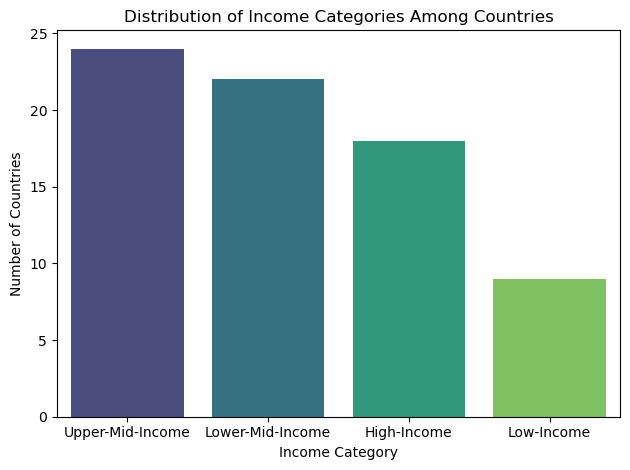

In [111]:
sns.barplot(x=df_inc_dist["Income_Category"],y=df_inc_dist["Country"],data=df_inc_dist,order=["Upper-Mid-Income","Lower-Mid-Income","High-Income","Low-Income"],palette='viridis')
plt.title('Distribution of Income Categories Among Countries')
plt.xlabel('Income Category')
plt.ylabel('Number of Countries')
plt.tight_layout()
plt.show()

**Summary of the distribution:**  
* High-Income: 18 countries  
* Low-Income: 9 countries  
* Lower-Mid-Income: 22 countries  
* Upper-Mid-Income: 24 countries  

### How does income category relate to GDP per capita and nominal GDP?

In [112]:
df_inc_gdp=df.groupby("Income_Category")[["GDP Per Capita(PPP)","Nominal GDP(USD million)"]].mean().sort_values(by="GDP Per Capita(PPP)",ascending=False)

In [113]:
df_inc_gdp = df_inc_gdp.reset_index()

In [114]:
df_inc_gdp

,Income_Category,GDP Per Capita(PPP),Nominal GDP(USD million)
0,High-Income,80226.388889,2.711648e+06
1,Upper-Mid-Income,46027.083333,6.880462e+05
2,Lower-Mid-Income,18123.272727,1.486579e+06
3,Low-Income,6551.444444,1.682103e+05


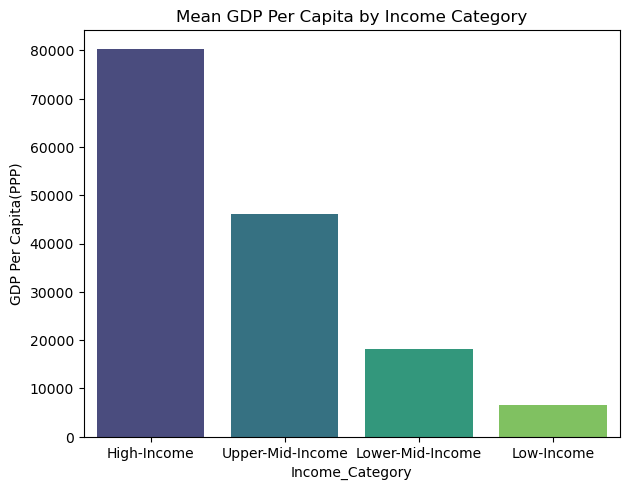

In [115]:
sns.barplot(x=df_inc_gdp["Income_Category"],y=df_inc_gdp["GDP Per Capita(PPP)"],palette='viridis')
plt.tight_layout()
plt.title('Mean GDP Per Capita by Income Category')
plt.show()

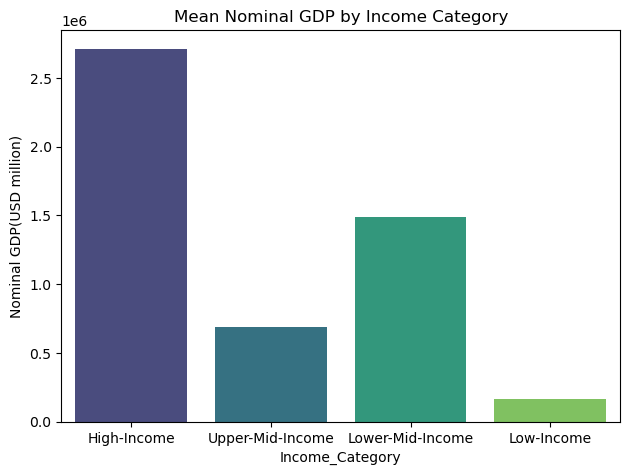

In [116]:
sns.barplot(x=df_inc_gdp["Income_Category"],y=df_inc_gdp["Nominal GDP(USD million)"],palette='viridis')
plt.tight_layout()
plt.title('Mean Nominal GDP by Income Category')
plt.show()

In [117]:
#df_melted = df_inc_gdp.melt(id_vars='Income_Category', var_name='GDP Type', value_name='Value')
#sns.barplot(x='Income_Category', y='Value', hue='GDP Type', data=df_melted, palette='viridis')

## GDP per Capita Analysis

### How does GDP per capita vary among different regions?

In [118]:
df.groupby("Sub Region")["GDP Per Capita(PPP)"].mean().to_frame().sort_values(by="GDP Per Capita(PPP)",ascending=False).rename(columns={"GDP Per Capita(PPP)":"AVG GDP Per Capita(PPP)"})

,AVG GDP Per Capita(PPP)
Sub Region,
Northern America,72934.000000
Western Europe,71360.200000
Oceania,60212.000000
Western Asia,55218.166667
Eastern Asia,53157.666667
Southeastern Asia,50455.000000
Eastern Europe,41049.076923
Central Asia,26931.000000
Latin America,21453.153846


**Observation:**
* North America has the highest average GDP per capita among the regions, indicating a relatively high standard of living and economic development in this region.


* Europe and the Middle East also have relatively high average GDP per capita, suggesting significant economic prosperity in these regions.


* South/Latin America and Africa have lower average GDP per capita compared to other regions, indicating lower levels of economic development and potentially greater economic challenges.


* The Asia & Pacific region falls in the middle range for average GDP per capita, indicating moderate economic development compared to other regions.

## Income Category and Food Prices

### How do food basket prices vary across different income categories?

In [119]:
df.groupby("Income_Category")["Food_Basket_Price(in $)"].mean().to_frame().sort_values(by="Food_Basket_Price(in $)")

,Food_Basket_Price(in $)
Income_Category,
Low-Income,23.634444
Lower-Mid-Income,25.515000
Upper-Mid-Income,30.250833
High-Income,40.754444


### Are there any regional differences in food prices among income categories?


In [120]:
df.groupby(["Sub Region","Income_Category"])["Food_Basket_Price(in $)"].mean().to_frame()

Food_Basket_Price(in $)
Sub Region        Income_Category                          
Africa            Low-Income                      25.737143
                  Lower-Mid-Income                23.170000
Central Asia      Lower-Mid-Income                20.150000
                  Upper-Mid-Income                23.730000
Eastern Asia      High-Income                     52.970000
                  Lower-Mid-Income                35.470000
                  Upper-Mid-Income                48.490000
Eastern Europe    Lower-Mid-Income                22.160000
                  Upper-Mid-Income                27.070000
Latin America     Lower-Mid-Income                25.796364
                  Upper-Mid-Income                37.590000
Northern America  High-Income                     42.915000
Oceania           High-Income                     44.620000
                  Upper-Mid-Income                40.170000
Southeastern Asia High-Income                     43.230000
                  Lower-Mid-Income                29.385000
                  Upper-Mid-Income                25.100000
Southern Asia     Low-Income                      16.275000
                  Lower-Mid-Income                25.975000
Western Asia      High-Income                     31.415000
                  Lower-Mid-Income                20.570000
                  Upper-Mid-Income                30.196667
Western Europe    High-Income                     40.372727
                  Upper-Mid-Income                31.247500

**Observation:**
* Food basket prices vary among income categories within each region, with some regions showing higher prices for higher-income categories (e.g., Asia & Pacific, Europe, Middle East, North America), while others do not follow a clear pattern (e.g., Africa, South/Latin America).


* In Africa and South/Latin America, lower-middle-income categories have similar or slightly higher food basket prices compared to low-income categories, indicating a different pricing trend compared to other regions.


* North America has the highest food basket prices for high-income categories among all regions, suggesting potentially higher living costs or different consumption patterns.


* Europe and Asia & Pacific show relatively consistent trends, with higher-income categories generally having higher food basket prices, indicating a potential correlation between income levels and food prices in these regions.

## How do food basket prices vary across different regions and income categories?

### What is the average food basket price in each region?

In [121]:
df.groupby("Sub Region")["Food_Basket_Price(in $)"].mean().to_frame().sort_values(by="Food_Basket_Price(in $)",ascending=False)

,Food_Basket_Price(in $)
Sub Region,
Eastern Asia,45.643333
Northern America,42.915000
Oceania,42.395000
Western Europe,37.939333
Southeastern Asia,31.775000
Western Asia,28.998333
Latin America,27.610769
Eastern Europe,26.314615
Africa,25.166667


### What is the average food basket price for each income category?

In [122]:
df.groupby("Income_Category")["Food_Basket_Price(in $)"].mean().to_frame().sort_values(by="Food_Basket_Price(in $)",ascending=False)

,Food_Basket_Price(in $)
Income_Category,
High-Income,40.754444
Upper-Mid-Income,30.250833
Lower-Mid-Income,25.515000
Low-Income,23.634444


## What is the relationship between food basket prices and GDP per capita?

### Is there a correlation between GDP per capita and food basket prices?

In [123]:
df.sample()

,Country,Continent,Sub Region,GN/GS,Income_Category,GDP Per Capita(PPP),Nominal GDP(USD million),Inflation(%),Food_Basket_Price(in $),Flour(1kg),...,Eggs(Dozen),Cooking Oil(1L),Chicken(1kg),Potato(1kg),Onion(1kg),Banana(1kg),Tomato(1kg),Orange(1Kg),Coca-Cola(0.5L),Bottled Water(1.5L)
46,Canada,North America,Northern America,Global North,High-Income,60495.0,2242182.0,2.9,39.92,1.1,...,3.14,6.2,5.98,1.6,2.36,1.56,3.98,3.17,1.66,0.93


In [124]:
df["GDP Per Capita(PPP)"].corr(df["Food_Basket_Price(in $)"])

0.6556990261835779

### How do food basket prices change as GDP per capita increases or decreases?

We can see from the graph below that usually as GDP per Capita increases the Food Basket Price increases as well

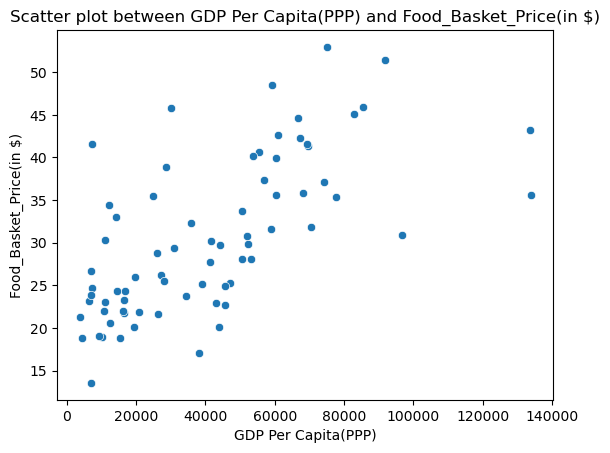

In [125]:
sns.scatterplot(x="GDP Per Capita(PPP)",y="Food_Basket_Price(in $)",data=df)
plt.title("Scatter plot between GDP Per Capita(PPP) and Food_Basket_Price(in $)")
plt.show()

**Observation:** We got a value of 0.64,so there seems to be a moderate positive correlation between GDP per capita and food basket prices. A correlation of 0.6478 suggests that as GDP per capita increases, food basket prices tend to increase as well, but the relationship is not perfect and there could be other factors at play.

## Which countries have the most expensive and least expensive food baskets?

### Country with the most expensive food basket

In [126]:
df.groupby("Country")["Food_Basket_Price(in $)"].sum().to_frame().sort_values(by="Food_Basket_Price(in $)",ascending=False).head(1)

,Food_Basket_Price(in $)
Country,
Hong Kong,52.97


So the Country with the most expensive Food Basket in our dataset is **Hong Kong**

### Country with the cheapest food basket

In [127]:
df.groupby("Country")["Food_Basket_Price(in $)"].sum().to_frame().sort_values(by="Food_Basket_Price(in $)",ascending=True).head(1)

,Food_Basket_Price(in $)
Country,
Pakistan,13.55


The country with the least expensive Food Basket in our dataset is **Pakistan**

### What are the top 5 countries with the highest  food basket prices?

In [128]:
df.groupby("Country")["Food_Basket_Price(in $)"].sum().to_frame().sort_values(by="Food_Basket_Price(in $)",ascending=False).head(5)

,Food_Basket_Price(in $)
Country,
Hong Kong,52.97
Switzerland,51.46
South Korea,48.49
United States,45.91
Uruguay,45.75


Top 5 countries with the highest food basket prices in our dataset are **Hong Kong, Switzerland, South Korea, United States, Uruguay** respectively

### What are the top 5 countries with the lowest  food basket prices?

In [129]:
df.groupby("Country")["Food_Basket_Price(in $)"].sum().to_frame().sort_values(by="Food_Basket_Price(in $)",ascending=True).head(5)

,Food_Basket_Price(in $)
Country,
Pakistan,13.55
Russia,17.11
Ukraine,18.82
Zambia,18.86
India,18.91


Top 5 countries with the lowest food basket price are **Pakistan, Russia, Ukraine, Zambia and India**	respectively

In [130]:
df.head()

,Country,Continent,Sub Region,GN/GS,Income_Category,GDP Per Capita(PPP),Nominal GDP(USD million),Inflation(%),Food_Basket_Price(in $),Flour(1kg),...,Eggs(Dozen),Cooking Oil(1L),Chicken(1kg),Potato(1kg),Onion(1kg),Banana(1kg),Tomato(1kg),Orange(1Kg),Coca-Cola(0.5L),Bottled Water(1.5L)
0,Hong Kong,Asia,Eastern Asia,Global North,High-Income,75128.0,406775.0,2.00,52.97,4.02,...,4.71,7.14,8.03,3.22,5.06,1.87,3.07,3.52,1.21,1.27
1,United States,North America,Northern America,Global North,High-Income,85373.0,28781083.0,3.50,45.91,3.62,...,3.40,3.50,11.00,1.65,1.48,1.08,4.37,2.76,0.83,1.46
2,Saudi Arabia,Asia,Western Asia,Global South,High-Income,70333.0,1106015.0,1.60,31.88,2.92,...,2.35,4.64,4.83,1.32,2.00,1.85,1.85,2.00,1.00,0.33
3,Ghana,Africa,Africa,Global South,Low-Income,7156.0,75244.0,25.80,41.53,2.66,...,2.22,3.92,5.03,2.96,3.51,0.89,2.00,7.54,0.63,0.30
4,Peru,South America,Latin America,Global South,Lower-Mid-Income,16631.0,282458.0,2.41,21.78,2.46,...,2.38,4.02,2.54,0.81,0.86,0.73,0.97,0.59,0.78,0.51
